In [1]:
!pip install translate

In [27]:
import pandas as pd

In [28]:
data=pd.read_csv('Nikedataset_cleaned.csv')
data.head()

,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,normalized_text
0,Tue Feb 27 18:14:53 +0000 2024,bug4bug_,walked down the street with my dogs rn nd saw ...,walked down the street with my dogs rn nd saw ...,walked down the street with my dogs rn nd saw ...,"['walked', 'down', 'the', 'street', 'with', 'm...","['walked', 'street', 'dogs', 'rn', 'nd', 'saw'...",walked street dogs rn nd saw guy nike logo shi...,walked street dogs rn nd saw guy nike logo shi...
1,Tue Feb 27 18:07:34 +0000 2024,FanaticsSucks,@novy_williams @MLB @Nike @Fanatics We've now ...,Weve now reached the point of referring to...,weve now reached the point of referring to...,"['weve', 'now', 'reached', 'the', 'point', 'of...","['weve', 'reached', 'point', 'referring', 'dis...",weve reached point referring dissatisfied cust...,weve reached point referring dissatisfied cust...
2,Tue Feb 27 17:59:35 +0000 2024,DirectingBarca,FC Barcelona say that they cannot close their...,FC Barcelona say that they cannot close their...,fc barcelona say that they cannot close their...,"['fc', 'barcelona', 'say', 'that', 'they', 'ca...","['fc', 'barcelona', 'say', 'cannot', 'close', ...",fc barcelona say cannot close contract nike pu...,fc barcelona say cannot close contract nike pu...
3,Tue Feb 27 17:54:48 +0000 2024,ManagingBarca,FC Barcelona say that they cannot terminate t...,FC Barcelona say that they cannot terminate t...,fc barcelona say that they cannot terminate t...,"['fc', 'barcelona', 'say', 'that', 'they', 'ca...","['fc', 'barcelona', 'say', 'cannot', 'terminat...",fc barcelona say cannot mate contract nike pum...,fc barcelona say cannot mate contract nike pum...
4,Tue Feb 27 17:27:36 +0000 2024,p_to_the_j_,@JustJewelMay a L/XL you know i still have all...,a LXL you know i still have all my nikeUA stu...,a lxl you know i still have all my nikeua stu...,"['a', 'lxl', 'you', 'know', 'i', 'still', 'hav...","['lxl', 'know', 'still', 'nikeua', 'stuff', 'l...",lxl know still nikeua stuff lucky sc shirt,lxl know still nikeua stuff lucky sc shirt


In [29]:
#from translate import Translator

#def convert_eng(tweet):
   # translator=Translator(to_lang="en", from_lang="id")
    #translation=translator.translate(tweet)
    #return translation

#data['tweet_english']=data['normalized_text'].apply(convert_eng)

In [30]:
#DATA PREPROCESSING
data= pd.DataFrame(data[['normalized_text']])
data.head(5)

,normalized_text
0,walked street dogs rn nd saw guy nike logo shi...
1,weve reached point referring dissatisfied cust...
2,fc barcelona say cannot close contract nike pu...
3,fc barcelona say cannot mate contract nike pum...
4,lxl know still nikeua stuff lucky sc shirt


In [31]:
data.to_csv('Nikedataset_cleaned2.csv')
data=pd.read_csv('Nikedataset_cleaned2.csv')
data= pd.DataFrame(data[['normalized_text']])
data.head()

,normalized_text
0,walked street dogs rn nd saw guy nike logo shi...
1,weve reached point referring dissatisfied cust...
2,fc barcelona say cannot close contract nike pu...
3,fc barcelona say cannot mate contract nike pum...
4,lxl know still nikeua stuff lucky sc shirt


In [32]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

# CLASSIFICATION USING TEXT BLOB

In [33]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
data_tweet=list(data['normalized_text'])
polarities=0

status=[]
total_positive=total_negative=total_neutral=total=0

for i, tweet in enumerate(data_tweet):
    analysis=TextBlob(tweet)
    polarities+=analysis.polarity

    if analysis.sentiment.polarity>0.0:
        total_positive+=1
        status.append('Positive')
    elif analysis.sentiment.polarity==0.0:
        total_neutral+=1
        status.append('Neutral')
    else:
        total_negative+=1
        status.append('Negative')

    total+=1

print(f'Data Analysis:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data: {total}')

Data Analysis:
Positive=18868
Neutral=8468
Negative=6679

Total Data: 34015


In [35]:
data['Classification']=status
data

,normalized_text,Classification
0,walked street dogs rn nd saw guy nike logo shi...,Positive
1,weve reached point referring dissatisfied cust...,Neutral
2,fc barcelona say cannot close contract nike pu...,Positive
3,fc barcelona say cannot mate contract nike pum...,Positive
4,lxl know still nikeua stuff lucky sc shirt,Positive
...,...,...
34010,bs wear nike shirt soliciting country gone abs...,Positive
34011,check listing added poshmark closet nike mens ...,Neutral
34012,absolutely pathetic nike adidas logo shirt wou...,Negative
34013,im going bit less week amp stay seoul looking ...,Positive


# VISUALIZATION

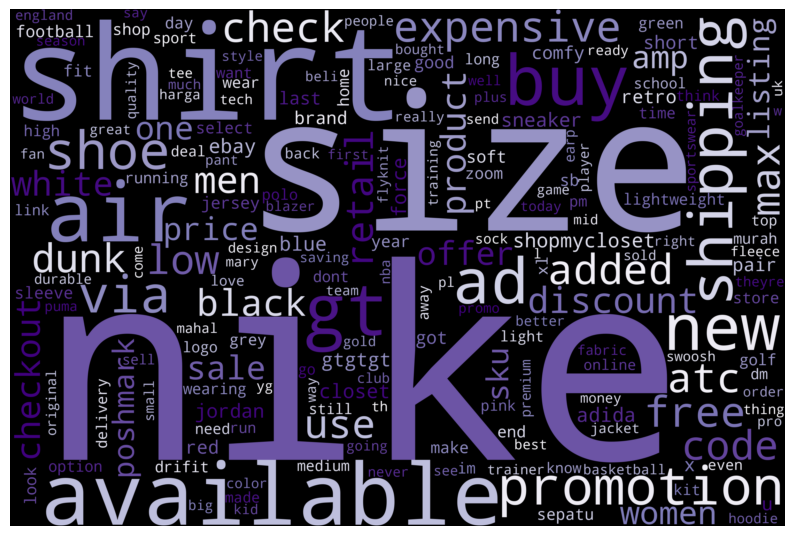

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordclud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words=' '.join([tweets for tweets in data['normalized_text']])

wordcloud=WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Purples_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)
plot_cloud(wordcloud)

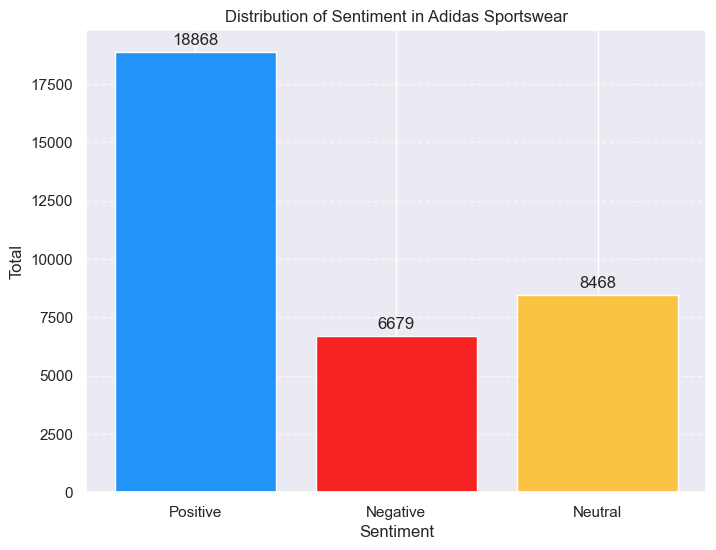

In [37]:
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

# CLASSIFICATION USING NAIVE BAYES

In [38]:
data

,normalized_text,Classification
0,walked street dogs rn nd saw guy nike logo shi...,Positive
1,weve reached point referring dissatisfied cust...,Neutral
2,fc barcelona say cannot close contract nike pu...,Positive
3,fc barcelona say cannot mate contract nike pum...,Positive
4,lxl know still nikeua stuff lucky sc shirt,Positive
...,...,...
34010,bs wear nike shirt soliciting country gone abs...,Positive
34011,check listing added poshmark closet nike mens ...,Neutral
34012,absolutely pathetic nike adidas logo shirt wou...,Negative
34013,im going bit less week amp stay seoul looking ...,Positive


In [39]:
#dataset=data.drop([''],axis=1, inplace=False)
dataset=[tuple(x) for x in data.to_records(index=False)]

In [40]:
import random

set_positive=[]
set_negative=[]
set_neutral=[]

for n in dataset:
    if(n[1]=='Positive'):
        set_positive.append(n)
    elif(n[1]=='Negative'):
        set_negative.append(n)
    else:
        set_neutral.append(n)

set_positive=random.sample(set_positive, k=int(len(set_positive)/2))
set_negative=random.sample(set_negative, k=int(len(set_negative)/2))
set_neutral=random.sample(set_neutral, k=int(len(set_neutral)/2))

train=set_positive+set_negative+set_neutral

train_set=[]

for n in train:
    train_set.append(n)

In [41]:
from textblob.classifiers import NaiveBayesClassifier
cl=NaiveBayesClassifier(train_set)
print("Accuracy Test: ",cl.accuracy(dataset))


MemoryError: 

In [ ]:
#Labeling
data_tweet=list(data['normalized_text'])
polarities=0

status=[]
total_positive=total_negative=total_neutral=total=0

for i,tweet in enumerate(data_tweet):
    analysis=TextBlob(tweet,classifier=cl)

    if analysis.classify()=='Positive':
        total_positive+=1
    elif analysis.classify()=='Neutral':
        total_neutral+=1
    else:
        total_negative+=1

    status.append(analysis.classify())
    total+=1

print(f'\nAnalysis Data:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data:{total}')

In [ ]:
status= pd.DataFrame("NaiveBayes": status})
data['NaiveBayes_classification']=status

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

In [ ]:
data

In [ ]:
data_eval=[tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n)>=4:
        if n[2]!=n[3]:
            print(f'Text:{n[0]}\nClassifier:{n[2]}\nClassifier Bayes: {n[3]}\n')
        else:
            print("Tuples don't have enough elements.")